# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Polarizacion-de-la-fuente-de-luz" data-toc-modified-id="Polarizacion-de-la-fuente-de-luz-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polarizacion de la fuente de luz</a></div><div class="lev2 toc-item"><a href="#Cargar-la-intensidad-con-polarizador-calibracion-y-P1" data-toc-modified-id="Cargar-la-intensidad-con-polarizador-calibracion-y-P1-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cargar la intensidad con polarizador calibracion y P1</a></div><div class="lev2 toc-item"><a href="#Resultados" data-toc-modified-id="Resultados-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Resultados</a></div>

# Polarizacion de la fuente de luz

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   12/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1
1. Polarizador de calibración

**Procedimiento**:
Necesitamos una referencia *absoluta* para conocer el estado de polarización del primer polarizador.
Todavía no sabemos los parámetros, que se calculan en el siguiente paso. 
Aquí se pretende calcular el ángulo donde pasa toda la luz a través de los dos polarizadores, polarizador 1 y de calibración


1. Se gira el polarizador una vuelta para buscar la posición de máxima intensidad. 


**Resultado**

El ángulo de P1 donde haya máxima intensidad es aquel alineado con el suelo.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from __future__ import print_function

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import pprint
from scipy.io import loadmat
from scipy import optimize

from phyton_optics import degrees
from phyton_optics.polarization_stokes import polarized_light, polarizer_linear
from polarimeter.utils import plot_experiment_residuals_1D
from polarimeter.polarimeter import get_polarimeter_parameters, intensity

## Cargar la intensidad con polarizador calibracion y P1
El máximo de intensidad alinea el eje del P1 con el polarizador de calibración (horizontal).

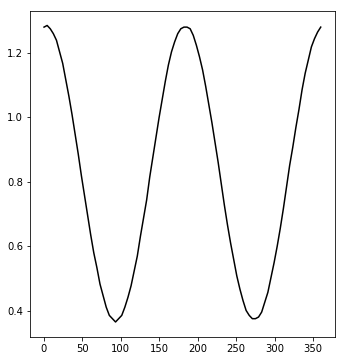

In [4]:
#Load data and represent

data_1=np.load('step2_P1_angle_2018-03-13.npy')
angles_1=data_1[:,0]
intensities_1=data_1[:,1]
I1=sp.mean(intensities_1)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(angles_1,intensities_1,'k')



## Resultados


In [5]:
#Fitting parameters 
# Fit the first set
sin_func = lambda par, x: par[0]+par[1]*np.cos(2*np.pi/par[2]*(x-par[3])) # Target function
errfunc = lambda par, x, y: sin_func(par, x) - y # Distance to the target function

In [6]:
#Fitting parameters 

# par[0]+par[1]*np.cos(2*np.pi/par[2]*(x-par[3]))
par0 = [1.75,0.1, 180, 0.] # Initial guess for the parameters
par1, success = optimize.leastsq(errfunc, par0[:], args=(angles_1, intensities_1))
print(par1)

[   0.82728087    0.45582669  180.13018608    3.25846393]


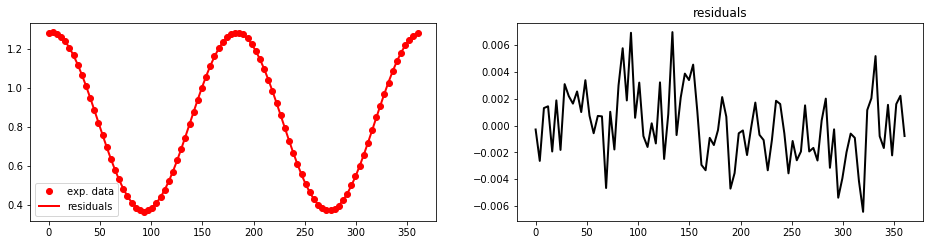

In [7]:
I_fitting=sin_func(par1, angles_1)
residuals=intensities_1-I_fitting

plot_experiment_residuals_1D(angles_1, intensities_1, I_fitting,  title='')

In [8]:
I_mean=par1[0]
I_fluctuation=par1[1]
angle_min=par1[3]

print("Average intensity   = {:4.5}".format(I_mean))
print("Amplitude lineality = {:4.5}".format(I_fluctuation))
print("Angle min           = {:4.5}º".format(angle_min/degrees))
print("Angle min           = {:4.5}º".format(angle_min/degrees-180))

Average intensity   = 0.82728
Amplitude lineality = 0.45583
Angle min           = 186.7º
Angle min           = 6.6962º


El ángulo del polarizador P1 respecto a suelo es 6.6962º